root
 |-- country_name: string (nullable = true)
 |-- country_iso2: string (nullable = true)
 |-- week: string (nullable = true)
 |-- category: string (nullable = true)
 |-- weekly_rank: integer (nullable = true)
 |-- show_title: string (nullable = true)
 |-- season_title: string (nullable = true)
 |-- cumulative_weeks_in_top_10: integer (nullable = true)

+------------+------------+----------+--------+-----------+--------------------+------------+--------------------------+
|country_name|country_iso2|      week|category|weekly_rank|          show_title|season_title|cumulative_weeks_in_top_10|
+------------+------------+----------+--------+-----------+--------------------+------------+--------------------------+
|   Argentina|          AR|17-12-2023|   Films|          1|Leave the World B...|         N/A|                         2|
|   Argentina|          AR|17-12-2023|   Films|          2|El Amor Menos Pen...|         N/A|                         1|
|   Argentina|          AR|17-12-202

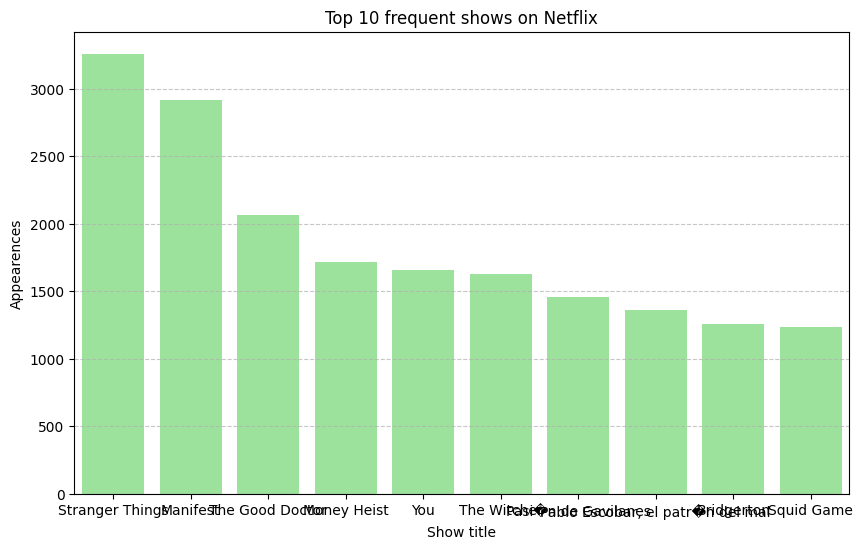

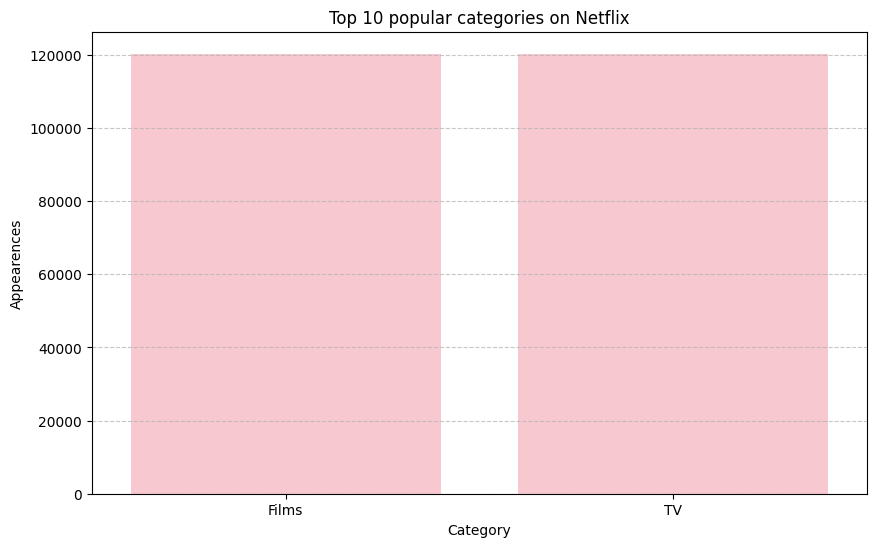

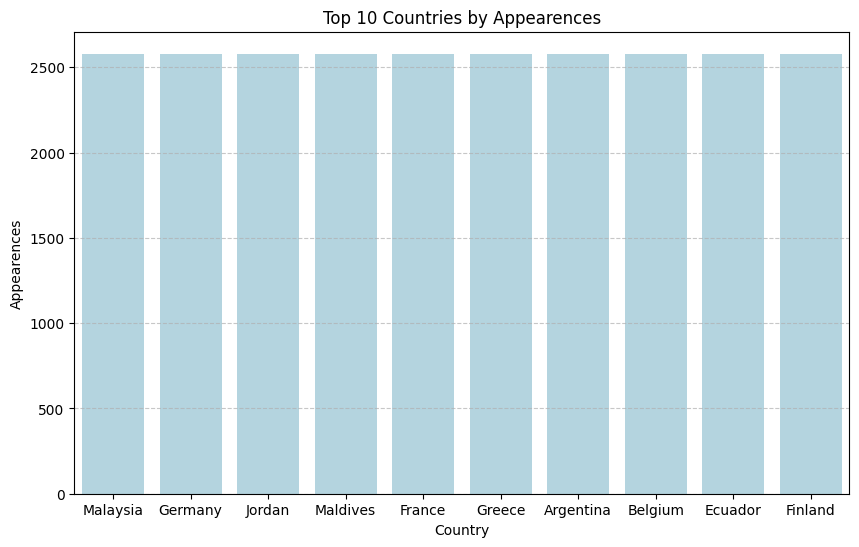

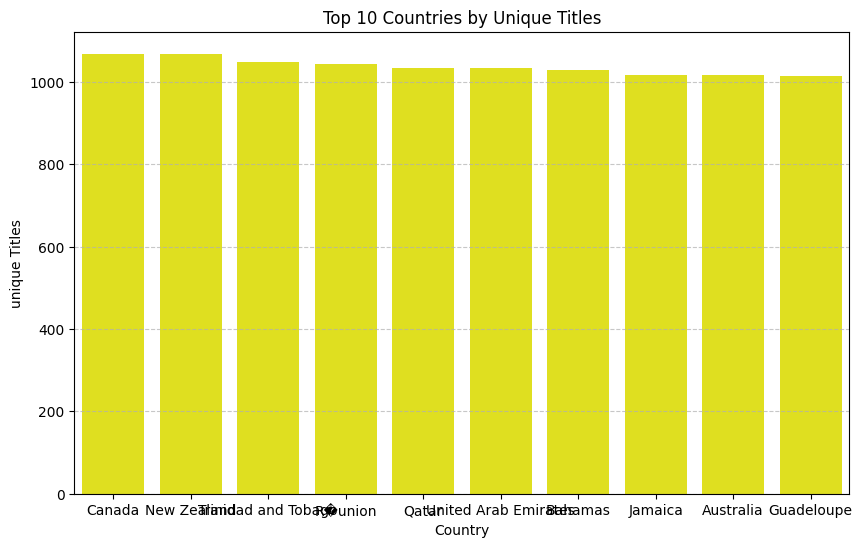

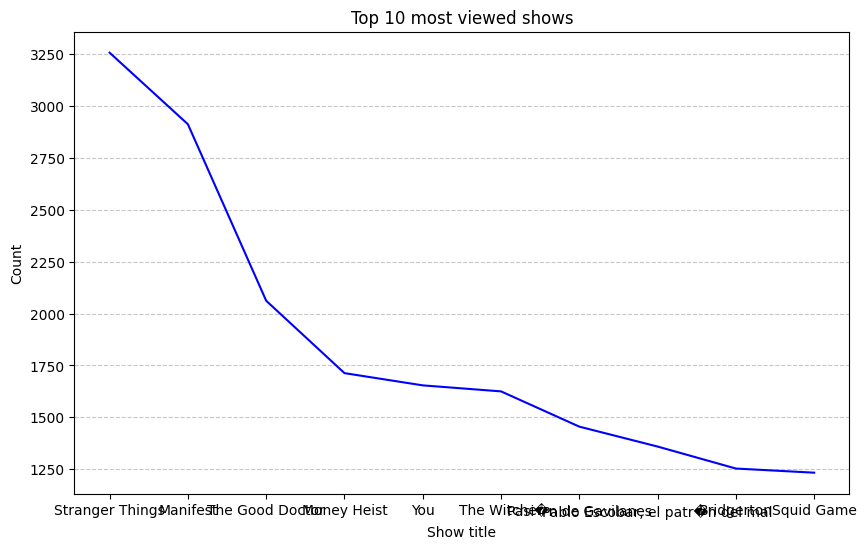

<bound method SparkSession.stop of <pyspark.sql.session.SparkSession object at 0x78204693a3d0>>

In [1]:
#install libraries
!pip install pyspark matplotlib seaborn
from pyspark.sql import SparkSession
from pyspark.sql.functions import count,col,desc,countDistinct
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#create spark session
spark= SparkSession.builder.appName("NetflixViewershipAnalysis").getOrCreate()

#load the dataset
df=spark.read.csv('/content/Netflix.csv',header=True, inferSchema=True)

df.printSchema()
df.show(5)

#clean the data

df_clean=df.dropna(subset=["country_name","category","weekly_rank","show_title","cumulative_weeks_in_top_10"])

#top 10 most frequent shows
top_shows=df_clean.groupBy("show_title")\
.agg(count("weekly_rank").alias("Appearences"))\
.orderBy(desc("Appearences"))

#conert to pandas dataframe
top_shows_pd=top_shows.limit(10).toPandas()

#bar plot for top shows
plt.figure(figsize=(10,6))
sns.barplot(x="show_title",y="Appearences", data=top_shows_pd,color="lightgreen")
plt.title("Top 10 frequent shows on Netflix")
plt.xlabel("Show title")
plt.ylabel("Appearences")
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

#most popular categories
top_categories=df_clean.groupBy("category") \
.agg(count("weekly_rank").alias("Appearences"))\
.orderBy(desc("Appearences"))

#convert to pandas Dataframe
top_categories_pd=top_categories.limit(10).toPandas()

#bar plot for top categories
plt.figure(figsize=(10,6))
sns.barplot(x="category",y="Appearences",data=top_categories_pd,color="pink")
plt.xlabel("Category")
plt.ylabel("Appearences")
plt.title("Top 10 popular categories on Netflix")
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

#Group by count and no of appearences
country_trends=df_clean.groupBy("country_name")\
.agg(count("weekly_rank").alias("Appearences"))\
.orderBy(desc("Appearences"))

#convert to pandas dataframe
country_trends_pd=country_trends.limit(10).toPandas()

#bar plot for top countries
plt.figure(figsize=(10,6))
sns.barplot(x="country_name",y="Appearences",data=country_trends_pd,color="lightblue")
plt.xlabel("Country")
plt.ylabel("Appearences")
plt.title("Top 10 Countries by Appearences")
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

#countries with highest no of unique titles in top 10
top_countries=df_clean.groupBy("country_name")\
.agg(countDistinct("show_title").alias("Unique_titles"))\
.orderBy(desc("Unique_titles"))

#convert to pandas dataframe
top_countries_pd=top_countries.limit(10).toPandas()

#bar plot for top countries by unique titles
plt.figure(figsize=(10,6))
sns.barplot(x="country_name",y="Unique_titles",data=top_countries_pd,color="yellow")
plt.xlabel("Country")
plt.ylabel("unique Titles")
plt.title("Top 10 Countries by Unique Titles")
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

#most viewed title
most_viewed_title=df_clean.groupBy("show_title")\
.agg(count("weekly_rank").alias("Count"))\
.orderBy(desc("Count"))

#convert to pandas dataframe
most_viewed_title_pd=most_viewed_title.limit(10).toPandas()

#line plot for most viewed shows
plt.figure(figsize=(10,6))
sns.lineplot(x="show_title",y="Count",data=most_viewed_title_pd,color="blue")
plt.xlabel("Show title")
plt.ylabel("Count")
plt.title("Top 10 most viewed shows")
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

#stop spark session
spark.stop
